## Линейная регрессия (LinearRegression) [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Title article**: Линейная регрессия. Разбор математики и реализации на python.

Тема  линейной регресии рассмотрена множество раз в различных источниках, но,  как говорится, "нет такой избитой темы, которую нельзя ударить еще раз". В данной статье рассмотрим указанную тему, используя как  математические выкладки, так и код python, пытаясь соблюсти баланс на  грани простоты и должном уровне для понимания математических основ.

Линейная регрессия представляется из себя регриссионную модель  зависимости одной (объясняемой, зависимой) переменной от другой или  нескольких других переменных (фактров, регрессоров, независимых  переменных) с линейной функцией зависимости. Рассмотрим модель линейной  регрессии, при которой зависимая переменная зависит лишь от одного  фактора, тогда функция, описывающуя зависимость y от x будет иметь следующий вид: 

$$f(x)=w_0+w_1*x$$

и задача сводится к нахождению весовых коэффициентов $w_0$ и $w_1$, таких что такая прямая максимально "хорошо" будет описывать исходные данные. Для этого зададим функцию ошибки, минимизация которой обеспечит подбор весов $w_0$ и $w_1$, используя метод наименьших квадратов:

$$MSE=\sum_{i=0}^{n}(y_i - f(x_i))^2$$

или подставив уравнение модели

$$MSE=\sum_{i=0}^{n}(y_i - w_0 - w_1*x_i)^2$$

Минимизируем функцию ошибки $MSE$ аналитическим способом, для этого найдем частные производные по $w_0$ и $w_1$

$$\frac{\partial MSE(w_0, w_1)}{\partial w_0} = -2*\sum_{i=0}^{n}(y_i - w_0 -w_1*x_i)$$

$$\frac{\partial MSE(w_0, w_1)}{\partial w_1} = -2*\sum_{i=0}^{n}(y_i - w_0 -w_1*x_i)*x_i$$

И приравняв их к нулю получим систему уравнений, решение которой обеспечит минимизацию функции потерь MSE.

$$\cases{0={-2*\sum_{i=0}^{n}(y_i - w_0 -w_1*x_i)}\\0 = -2*\sum_{i=0}^{n}((y_i - w_0 -w_1*x_i)*x_i)}$$

Раскроем сумму

$$\cases{0={- w_0*n + \sum_{i=0}^{n}(y_i  -w_1*x_i)}\\0 = -2*\sum_{i=0}^{n}(y_i*x_i) - w_0*\sum_{i=0}^{n}x_i -w_1*\sum_{i=0}^{n}x_i)}$$

Выразим $w_0$ из первого уравнения

$$w_0=\frac{\sum_{i=0}^{n}(y_i)}{n} - w_1*\frac{\sum_{i=0}^{n}(x_i)}{n}$$

Подставив во второе уравнение решим относительно $w_1$

$$0 = \sum_{i=0}^{n}(y_i*x_i) - (\frac{\sum_{i=0}^{n}y_i}{n} - w_1 \frac{\sum_{i=0}^{n}x_i}{n})*\sum_{i=0}^{n}x_i^2 - w_1*\sum_{i=0}^{n}x_i^2$$

$$0 = \sum_{i=0}^{n}(y_i*x_i) - \frac{\sum_{i=0}^{n}y_i\sum_{i=0}^{n}x_i}{n} + w_1 \frac{\sum_{i=0}^{n}x_i\sum_{i=0}^{n}x_i}{n} - w_1*\sum_{i=0}^{n}x_i^2$$

И выразив $w_1$ последнего уравнения получим

$$w_1 = \frac{\frac{\sum_{i=0}^{n}(x_i*\sum_{i=0}^{n}(y_i))}{n}-\sum_{i=0}^{n}(y_i*x_i)}
{\frac{\sum_{i=0}^{n}(x_i*\sum_{i=0}^{n}(x_i))}{n}-\sum_{i=0}^{n}(x_i^2)}$$

Задача решена, однако представленный способ слабо распространим на большое количество фичей, уже при появлении второго признака вывод становится достаточно громоздким, не говоря уже о большем количестве признаков.

Справиться с этой задачей нам поможет матричный способ представления функции потерь и ее минимизация путем дифференцирования и нахождения экстремума в матричном виде.

Предположим, что дана следующая таблица с данными

|f1 |f2 |f3 | y |
|---|---|---|---|
|x11|x12|x13|y1 |
|...|...|...|...|
|x1n|x2n|x3n|yn |

Для вычисления интерсепта (коэффициента $w_0$) необходимо к таблице добавить столбец слева с фактором f0 все значения которого равны 0. И тогда столбцы f0-f3 (по количеству столбцов не ограничены, можно считать $fn$) можно выделить в матрицу X, целевую переменную в матрицу-столбец $y$, а искомые коэффициенты можно представить в виде вектора $w$.

$$X = \left [\begin{array}{cccc}x_{01}&x_{11}&x_{12}&x_{13}\\
...&...&...&...\\
x_{0n}&x_{1n}&x_{1n}&x_{1n} \end{array}\right] 
y = \left [\begin{array}{cccc} 
y_0 \\ y_1 \\ y_2 \\ y_3 \end{array}\right]
w = \left [\begin{array}{cccc} 
w_0 & w_1 & w_2 & w_3 \end{array}\right]$$

Тогда функцию потерь $MSE=\sum_{i=0}^{n}(y_i-f(x_i))^2 $

можно представить в следующем виде

$$ MSE=(y-X*w)^T(y-X*w)$$

Перед тем как переходить к дифференцированию необходимо учесть возможность переобучения (характеризуется большими значениями весовых коэффициентнов) и добавить регуляризацию (воспользуемся квадратом L2 нормы вектора весов)

$$ MSE=(y-X*w)^T(y-X*w) + \lambda*||w||_2^2$$

Представим в виде скалярного произведения < > (и произведение слева и норму вектора) и вычислим производную используя дифференциал

$$ \partial(<(y-X*w),(y-X*w)> + \lambda <w, w>)$$

используя правило 

$$ \partial(<x,x>) = <2x,\partial x>$$

приведем формулу к следующему виду

$$(<2*(y-X*w),\partial (y-X*w)>) + (<2\lambda w, \partial w>)$$

Поскольку дифференциал разницы равен разнице дифференциалов, дифференциал константы ($y$) равен нулю и константу (в данном случае матрицу $X$) можно вынести за знак дифференциала, получим

$$(<2*(y-X*w), X*\partial w>) + 2\lambda w$$

Используя свойство скалярного произведения перенесем матрицу $X$ справа налево незабыв транспонировать ее

$$(<2*X^T*(y-X*w), \partial w>)  + 2\lambda w$$

Собственно, то что слева и есть дифференциал, найдем экстремум приравняв его к нулю и решив по параметрам $w$

$$2*X^T*(X*w-y)  + 2\lambda w =0$$

раскроем скобки и перенесем значения без w вправо

$$X^T*X*w  + \lambda w = X^T*y$$

Умножение на вектор весов вынесем вправо не забыв оставить единичную матрицу при $\lambda$

$$(X^T*X  + \lambda*I)*w = X^T*y$$

Домножим слева обе стороны равенства на обратную матрицу $(X^T*X  + \lambda*I)$, тогда получим

$$w = (X^T*X  + \lambda*I)^{-1}*X^T*y$$

В данном случае регуляризация помимо решения задачи избавления от переобучения еще избавляет от потенциальной возможности выраженной матрицы произведения $X^T*X$ добавляя единичную матрицу с коэффициентами.

Аналитическое решение получено, переходим к реализации на python.

In [8]:
#импорт необходимых библиотек
import numpy as np
from sklearn.linear_model import LinearRegression

#зададим начальные условия
f0 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
f1 = np.array([1.1, 2.1, 3.1, 4.4, 5.2, 6.4, 7.1, 8.2, 9.4, 10.5])
f2 = np.array([1.4, 2.3, 3.4, 4.1, 5.5, 6.2, 7.3, 8.4, 9.2, 10.1])
f3 = np.array([1.2, 2.2, 3.4, 4.2, 5.3, 6.2, 7.3, 8.4, 9.2, 10.3])
y = np.array([[1.2], [2.2], [3.3], [4.3], [5.2], [6.3], [7.2], [8.3], [9.3], [10.2]])
w = np.array([np.nan, np.nan, np.nan, np.nan])
X = np.array([f0, f1, f2, f3]).T
l = 0.01

#рассчитаем коэффициенты используя выведенную формулу
coef_matrix = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+l*np.ones((X.shape[1], X.shape[1]))), X.T), y)
print(f'Коэффициенты полученные расчетным путем {coef_matrix.T[0]}')

#проверим расчет используя библиотеку sklearn
model = LinearRegression().fit(X, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(f'Коэффициенты полученные с использованием библиотеки sklearn {coef_sklearn.T[0]}')

Коэффициенты полученные расчетным путем [0.05243378 0.42645844 0.10896854 0.45293961]
Коэффициенты полученные с использованием библиотеки sklearn [0.05994939 0.42839296 0.09249473 0.46642055]


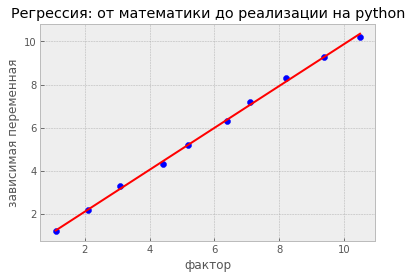

<Figure size 780x440 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.scatter(x=f1, y=y.T[0], color = 'blue')
plt.plot(f1, 0.17597053 + 0.96939643*f1, color='red')
plt.title("Регрессия: от математики до реализации на python")
plt.xlabel("фактор")
plt.ylabel("зависимая переменная")
plt.figure(figsize=(780/72, 440/72))
plt.show()